<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Future_Risk_prediction/Data_science_group_project('final').ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Necessary Libraries

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt








# Loading the Dataset and dispalying


In [193]:

# Load dataset using pd.read_excel
df = pd.read_excel("/content/drive/MyDrive/DSGP/modified_chemical_import_data.xlsx")

In [194]:
# Display first few rows
df.head()

,Importer_ID,Chemical_Name,Import_Frequency,Import_Quantity (kg),Country_of_Origin,Compliance_History,Compliance_Score,Past_Violations,Financial_Stability,Risk_Category,Import_Trend,Future_Prediction
0,IMP001,"Fluorides; fluorosilicates, fluoroaluminates, ...",36,5199,Pakistan,Excellent,3.0,4,High,Risky,0,Decrease in imports
1,IMP002,Sulphuric acid; oleum,26,3398,Brazil,Poor,1.0,1,High,Not Risky,-10,Decrease in imports
2,IMP003,Sulphuric acid; oleum,47,5626,India,Average,2.0,5,Medium,Risky,21,Increase in imports
3,IMP004,Cyanides and cyanide oxides: Of sodium,91,7700,India,Excellent,3.0,4,Medium,Not Risky,44,Increase in imports
4,IMP005,Nitric acid; sulphonitric acids,63,8377,China,Average,2.0,4,Low,Not Risky,-28,Decrease in imports


# Exploratory Data Analysis (EDA)


In [195]:
# Displaying Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Importer_ID           400 non-null    object 
 1   Chemical_Name         400 non-null    object 
 2   Import_Frequency      400 non-null    int64  
 3   Import_Quantity (kg)  400 non-null    int64  
 4   Country_of_Origin     400 non-null    object 
 5   Compliance_History    400 non-null    object 
 6   Compliance_Score      290 non-null    float64
 7   Past_Violations       400 non-null    int64  
 8   Financial_Stability   400 non-null    object 
 9   Risk_Category         400 non-null    object 
 10  Import_Trend          400 non-null    int64  
 11  Future_Prediction     400 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 37.6+ KB


In [196]:
# Summary Statistics (useful for numerical features)
print(df.describe())

       Import_Frequency  Import_Quantity (kg)  Compliance_Score  \
count        400.000000            400.000000        290.000000   
mean          74.932500          72759.257500          1.993103   
std           39.853088         128844.794138          0.836011   
min            5.000000            102.000000          1.000000   
25%           42.000000           3419.750000          1.000000   
50%           69.500000           6738.500000          2.000000   
75%          108.000000          43932.000000          3.000000   
max          149.000000         494540.000000          3.000000   

       Past_Violations  Import_Trend  
count       400.000000    400.000000  
mean          2.477500      0.077500  
std           1.688675     55.002816  
min           0.000000   -130.000000  
25%           1.000000    -40.000000  
50%           3.000000      4.000000  
75%           4.000000     38.000000  
max           5.000000    132.000000  


## Identifying Categorical and Numerical Columns

In [197]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

### Displaying the Categorical Features

In [198]:
# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_cols:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(df[categorical_cols].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Compliance_History
- Financial_Stability
- Risk_Category
- Future_Prediction

Data Type of Categorical Features:
Importer_ID            object
Chemical_Name          object
Country_of_Origin      object
Compliance_History     object
Financial_Stability    object
Risk_Category          object
Future_Prediction      object
dtype: object


### identifying Unique values and their count relevant to each categorical column:


In [199]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP384    1
IMP383    1
IMP382    1
IMP381    1
IMP380    1
         ..
IMP005    1
IMP004    1
IMP003    1
IMP002    1
IMP001    1
Name: count, Length: 400, dtype: int64
 
Chemical_Name
Bromine                                                                           45
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts    40
Chlorine                                                                          39
Cyanides and cyanide oxides: Of sodium                                            35
Iodine                                                                            34
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      32
Cyanides and cyanide oxides: Other                                                32
Halides and halide oxides of non-metals                                           31
Nitric acid; sulphonitric acids                      

In [200]:
# Check for null values in categorical columns
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values.")
    else:
        print(f"Column '{col}' has no null values.")

Column 'Importer_ID' has no null values.
Column 'Chemical_Name' has no null values.
Column 'Country_of_Origin' has no null values.
Column 'Compliance_History' has no null values.
Column 'Financial_Stability' has no null values.
Column 'Risk_Category' has no null values.
Column 'Future_Prediction' has no null values.


In [201]:
# Checking null values in other forms like unknown

# Check for 'unknown', '?', 'na', etc. in categorical columns
for col in categorical_cols:
    # List of known unknown values
    unknown_values = ['unknown', '?', 'na', 'n/a', 'NA', 'N/A', 'Unknown', 'none']  # Add more if needed
    unknown_count = 0

    # Loop through each unknown value and count its occurrences in the column
    #Using list comprehenshion to directly compare each value with unknow_values
    unknown_count = sum([1 for value in df[col].astype(str).str.lower() if value in [x.lower() for x in unknown_values]])


    # Check if there are any unknown values
    if unknown_count > 0:
        print(f"Column '{col}' has {unknown_count} unknown/null-like values.")
    else:
        # Check for other possible representations of missing values like empty strings or strings with spaces
        other_missing_count = df[col].isin(['', ' ', '  ']).sum()

        if other_missing_count > 0:
            print(f"Column '{col}' has {other_missing_count} other missing values (empty strings or strings with space).")
        else:
            print(f"Column '{col}' has no unknown/null-like values.")

Column 'Importer_ID' has no unknown/null-like values.
Column 'Chemical_Name' has no unknown/null-like values.
Column 'Country_of_Origin' has no unknown/null-like values.
Column 'Compliance_History' has no unknown/null-like values.
Column 'Financial_Stability' has no unknown/null-like values.
Column 'Risk_Category' has no unknown/null-like values.
Column 'Future_Prediction' has no unknown/null-like values.


## Visualizing the Distribution of the Categorical columns

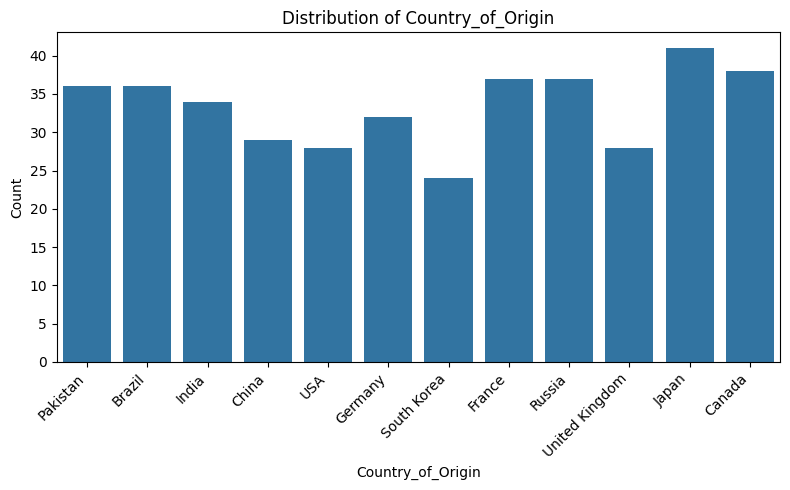

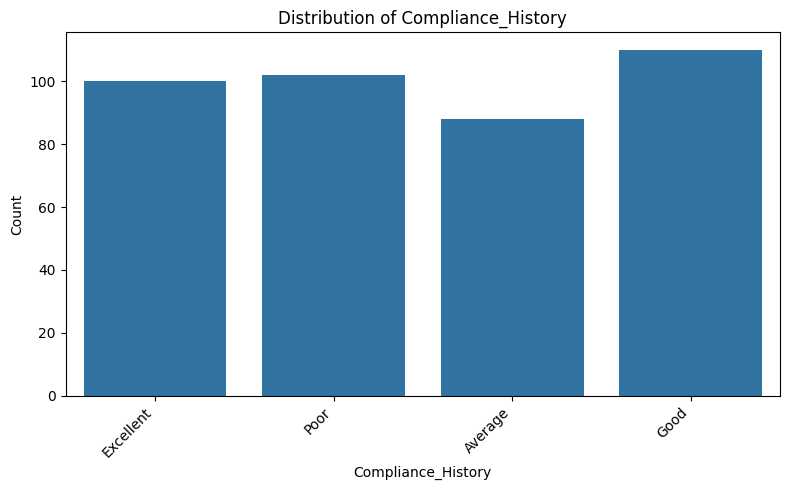

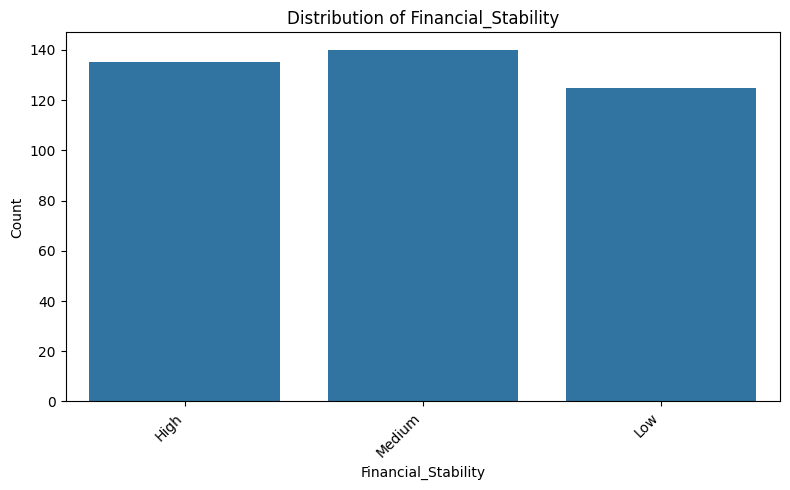

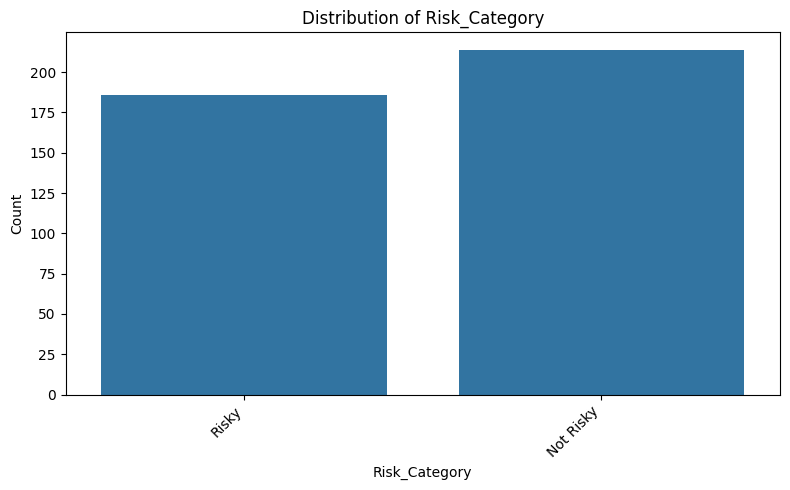

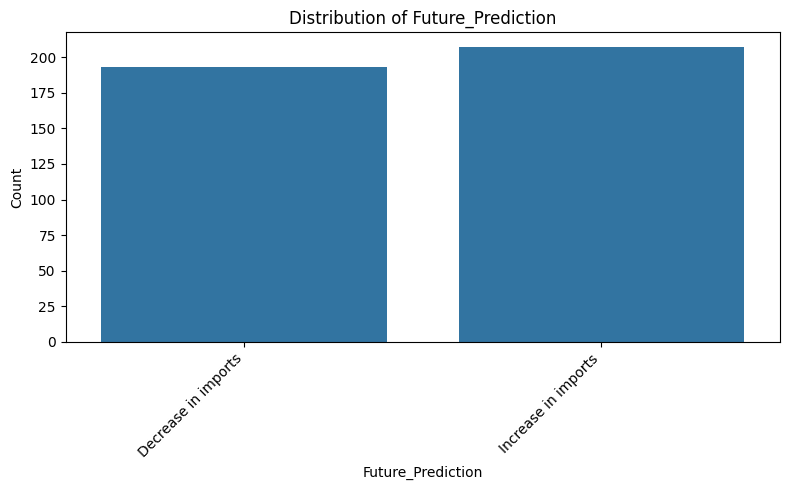

In [202]:

# List of specific categorical columns to visualize
categorical_cols = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability', 'Risk_Category', 'Future_Prediction']

# Iterate through each categorical column and create a countplot
for col in categorical_cols:
    plt.figure(figsize=(8, 5))  # Adjust figure size to a smaller size
    sns.countplot(x=col, data=df)

    # Set plot titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Ensure layout is tight and labels don't overlap
    plt.tight_layout()
    plt.show()


## Displaying the Numerical Columns

In [203]:

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_cols:
    print(f"- {feature}")

# Display data type of the numerical columns
print("\nData Type of Numerical Features:")
print(df[numerical_cols].dtypes)


Numerical Features:
- Import_Frequency
- Import_Quantity (kg)
- Compliance_Score
- Past_Violations
- Import_Trend

Data Type of Numerical Features:
Import_Frequency          int64
Import_Quantity (kg)      int64
Compliance_Score        float64
Past_Violations           int64
Import_Trend              int64
dtype: object


In [204]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_cols:
    unique_values = df[col].unique()
    value_counts = df[col].value_counts()
    print(value_counts)
    print(" ")


Unique values and their count in the numerical columns:

Import_Frequency
63     10
57      8
37      8
113     7
99      7
       ..
123     1
136     1
35      1
29      1
134     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity (kg)
1851      5
6877      5
7713      5
1635      4
313945    4
         ..
6959      1
18118     1
2606      1
633       1
15391     1
Name: count, Length: 285, dtype: int64
 
Compliance_Score
1.0    102
3.0    100
2.0     88
Name: count, dtype: int64
 
Past_Violations
4    77
1    73
3    71
0    66
5    57
2    56
Name: count, dtype: int64
 
Import_Trend
 27     7
-10     6
-51     6
-28     6
 15     6
       ..
 69     1
-110    1
-82     1
 73     1
-67     1
Name: count, Length: 180, dtype: int64
 


In [205]:
# Check for null values in categorical columns
for col in numerical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values.")
    else:
        print(f"Column '{col}' has no null values.")

Column 'Import_Frequency' has no null values.
Column 'Import_Quantity (kg)' has no null values.
Column 'Compliance_Score' has 110 null values.
Column 'Past_Violations' has no null values.
Column 'Import_Trend' has no null values.


In [206]:
import numpy as np

# Get numerical columns in the DataFrame
numerical_cols = df.select_dtypes(include=['number']).columns

# Checking for missing or invalid numerical values
for col in numerical_cols:
    # Check for NaN, None, or infinity values in numerical columns
    missing_count = df[col].isnull().sum()  # Check for NaN or None
    infinite_count = np.isinf(df[col]).sum()  # Check for infinity values

    # Total count of missing or invalid values (NaN + infinity)
    total_invalid_count = missing_count + infinite_count

    if total_invalid_count > 0:
        print(f"Column '{col}' has {total_invalid_count} missing or invalid values (NaN or Infinity).")
    else:
        print(f"Column '{col}' has no missing or invalid values.")


Column 'Import_Frequency' has no missing or invalid values.
Column 'Import_Quantity (kg)' has no missing or invalid values.
Column 'Compliance_Score' has 110 missing or invalid values (NaN or Infinity).
Column 'Past_Violations' has no missing or invalid values.
Column 'Import_Trend' has no missing or invalid values.


## Visualization of the Correlation HeatMap

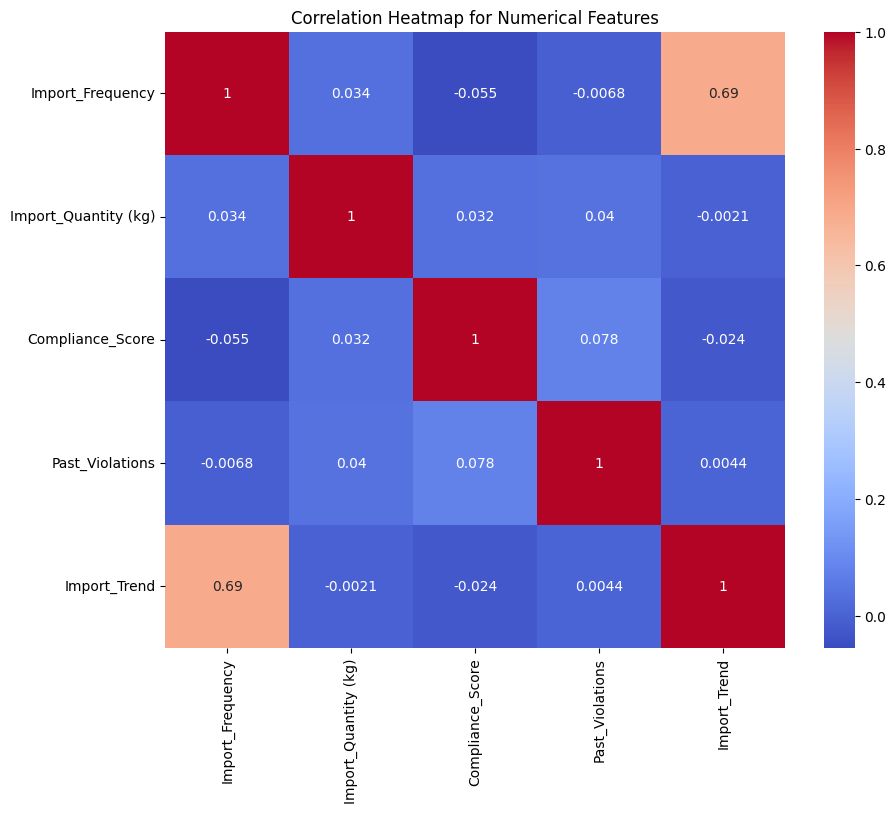

In [207]:
# Plotting the Correlation HeatMap for the Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## Handling the Outliers

### Visualizing the Outliers

In [208]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

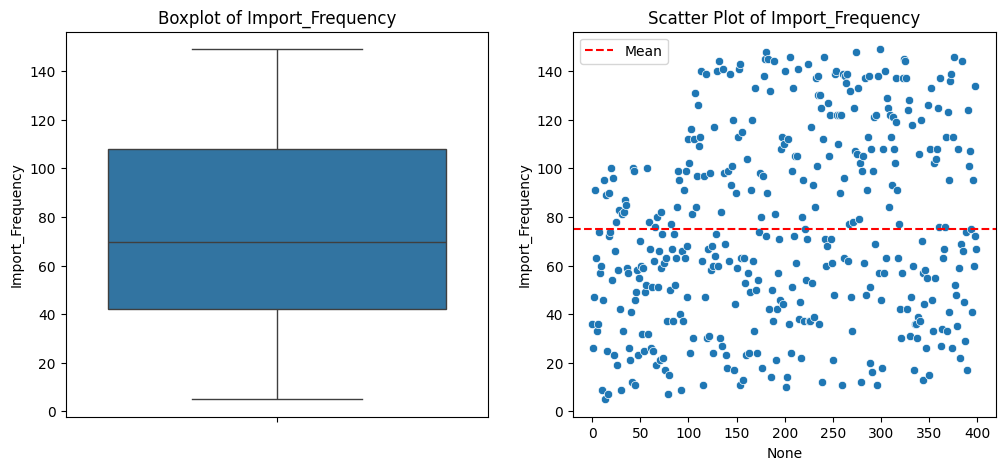

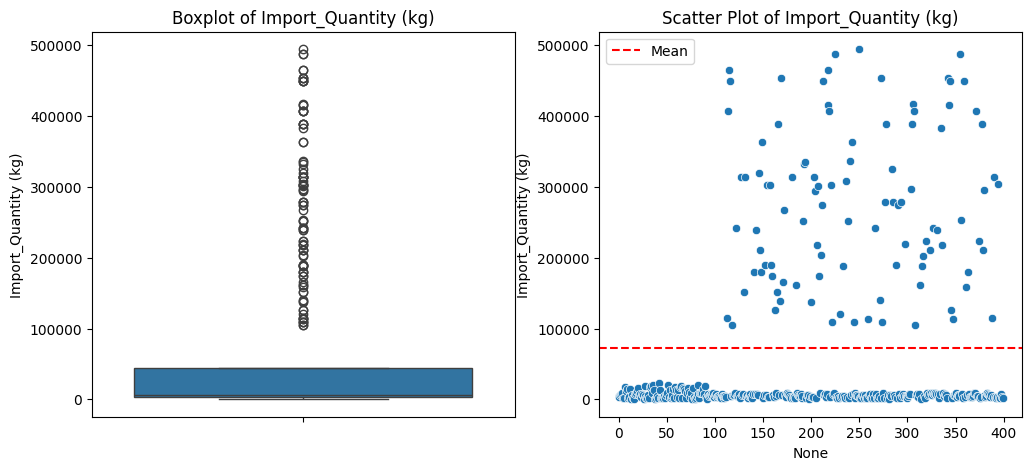

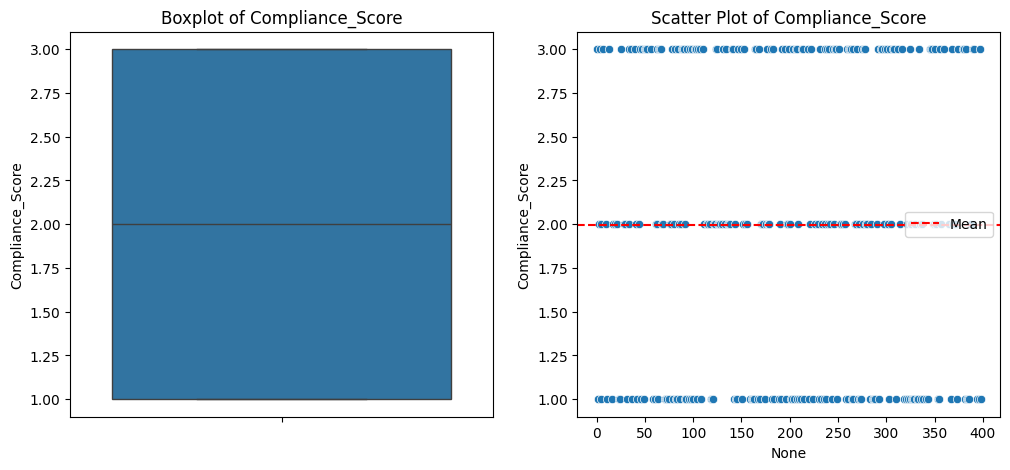

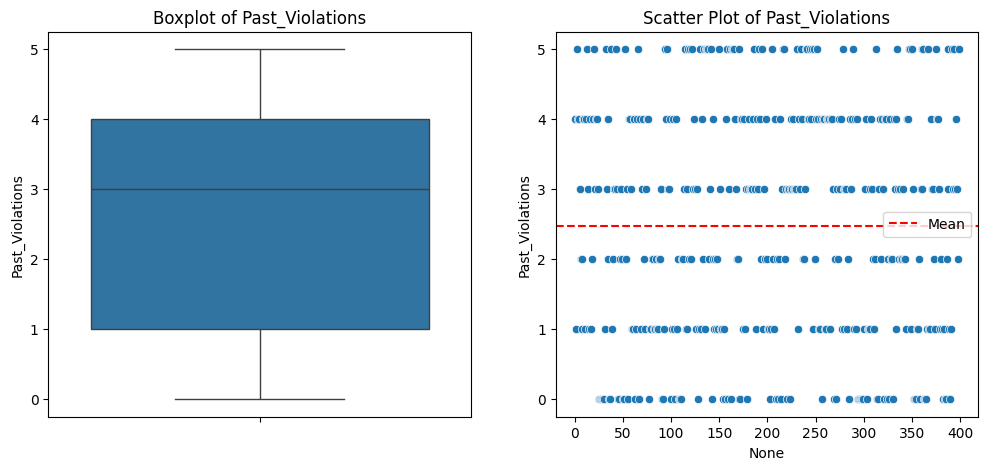

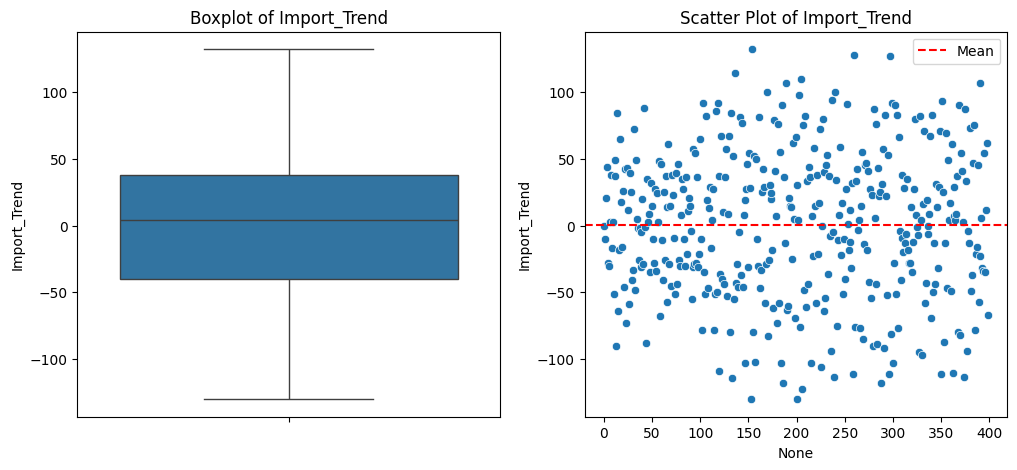

In [209]:
# Function to visualize outliers using boxplot and scatter plot
def visualize_outliers(data, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data.index, y=data[column])
    plt.axhline(data[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.title(f'Scatter Plot of {column}')
    plt.legend()

    plt.show()

# Visualize outliers for numerical columns
for col in numerical_cols:
    visualize_outliers(pd.DataFrame(df), col)

In [210]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_cols:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(df), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 150)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
------------------------------------------------------------------------------------------------------------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID                                                                  Chemical_Name  Import_Frequency  Import_Quantity (kg) Country_of_Origin Compliance_History  Compliance_Score  Past_Violations Financial_Stability Risk_Category  Import_Trend   Future_Prediction
     IMP114                         Hydrogen peroxide, whether or not solidified with urea               140                114397    United Kingdom               Good               NaN                3              Medium     Not Risky            27 Increase in imports
     IMP115                         Hydrogen peroxide, whether or not solidified with urea                62                406955             India

## Visualizing the Distribution of the Numerical columns


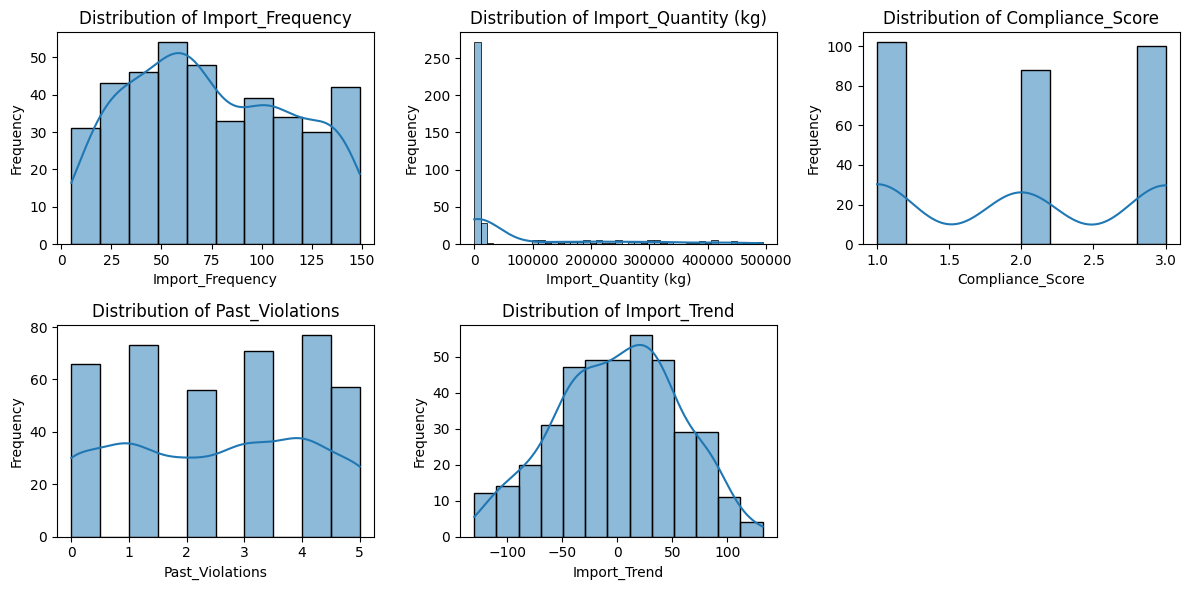

In [211]:
# Visulaizing the Distribution of the Numerical Features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

# Displaying the Plot
plt.show()

# Data Preprocessing

## Data Cleaning

In [212]:
# Step 1: Removing whitespaces from the categorical cols


# List of categorical columns
categorical_features = ["Chemical_Name", "Country_of_Origin", "Compliance_History", "Financial_Stability"]

# Remove leading and trailing whitespaces from object type columns
for col in categorical_features:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [213]:
# Step 2: Dropping duplicate values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [214]:
# Display dataset information
print("\nDataset information after removing duplicates:")
df.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Importer_ID           400 non-null    object 
 1   Chemical_Name         400 non-null    object 
 2   Import_Frequency      400 non-null    int64  
 3   Import_Quantity (kg)  400 non-null    int64  
 4   Country_of_Origin     400 non-null    object 
 5   Compliance_History    400 non-null    object 
 6   Compliance_Score      290 non-null    float64
 7   Past_Violations       400 non-null    int64  
 8   Financial_Stability   400 non-null    object 
 9   Risk_Category         400 non-null    object 
 10  Import_Trend          400 non-null    int64  
 11  Future_Prediction     400 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 37.6+ KB


## Handling outilers

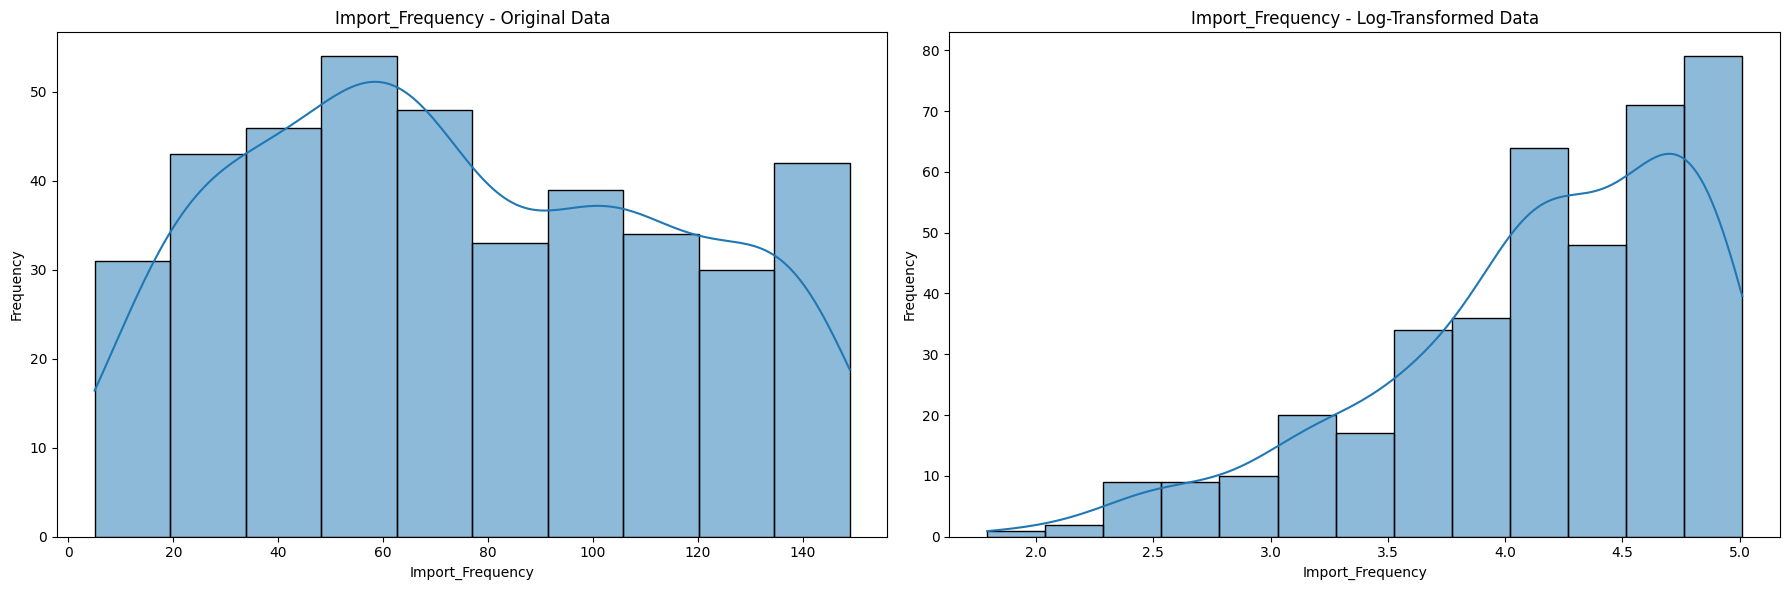

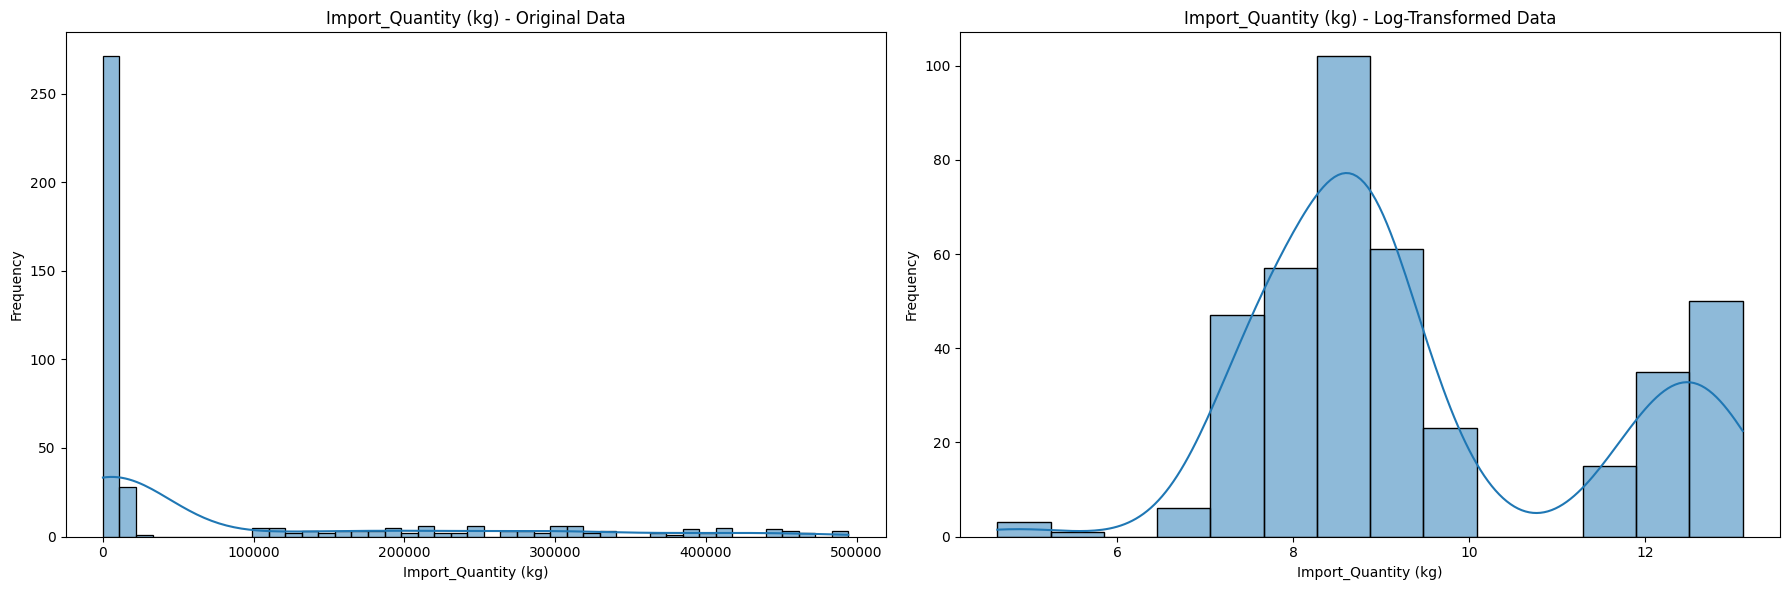

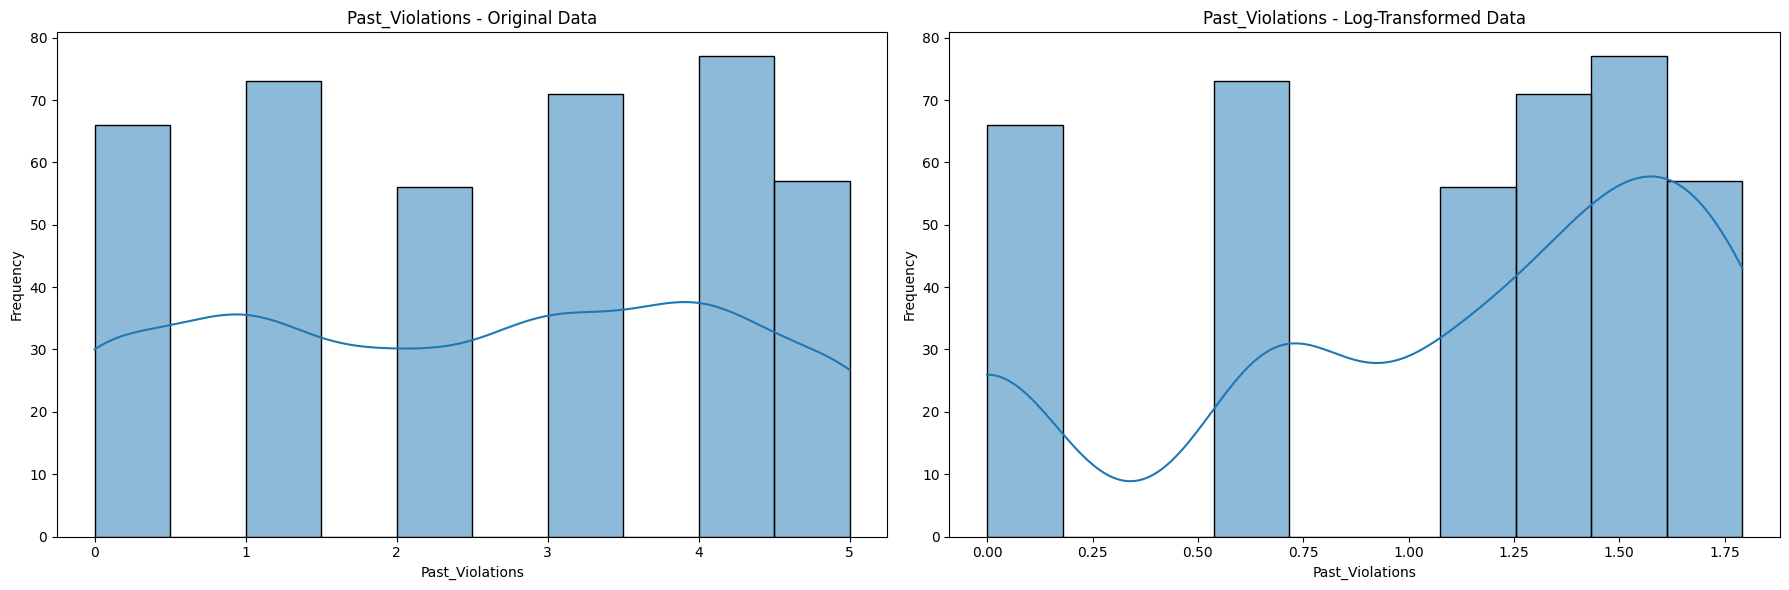

Original Data Summary Statistics:
       Import_Frequency  Import_Quantity (kg)  Compliance_Score  \
count        400.000000            400.000000        290.000000   
mean          74.932500          72759.257500          1.993103   
std           39.853088         128844.794138          0.836011   
min            5.000000            102.000000          1.000000   
25%           42.000000           3419.750000          1.000000   
50%           69.500000           6738.500000          2.000000   
75%          108.000000          43932.000000          3.000000   
max          149.000000         494540.000000          3.000000   

       Past_Violations  Import_Trend  
count       400.000000    400.000000  
mean          2.477500      0.077500  
std           1.688675     55.002816  
min           0.000000   -130.000000  
25%           1.000000    -40.000000  
50%           3.000000      4.000000  
75%           4.000000     38.000000  
max           5.000000    132.000000  

Log-Transf

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the original DataFrame for log transformation
df_log = df.copy()

# Apply log transformation to selected columns in the original data
for col in ['Import_Frequency', 'Import_Quantity (kg)', 'Past_Violations']:
    df_log[col] = np.log1p(df_log[col])  # Apply log1p to handle zeros

# Visualize the distributions for original and log-transformed data
for col in ['Import_Frequency', 'Import_Quantity (kg)', 'Past_Violations']:
    plt.figure(figsize=(18, 6))  # Adjust figure size as needed

    # Plot Original Data
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} - Original Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot Log-Transformed Data
    plt.subplot(1, 2, 2)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'{col} - Log-Transformed Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Display summary statistics (describe) for the original and log-transformed data
print("Original Data Summary Statistics:")
print(df.describe())

print("\nLog-Transformed Data Summary Statistics:")
print(df_log.describe())


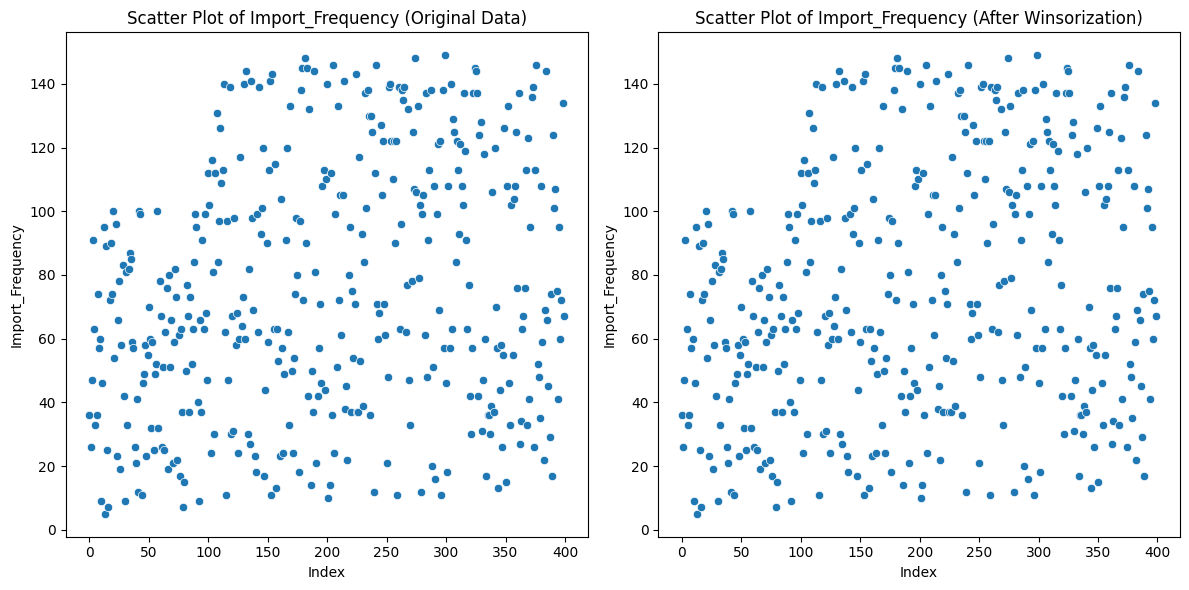

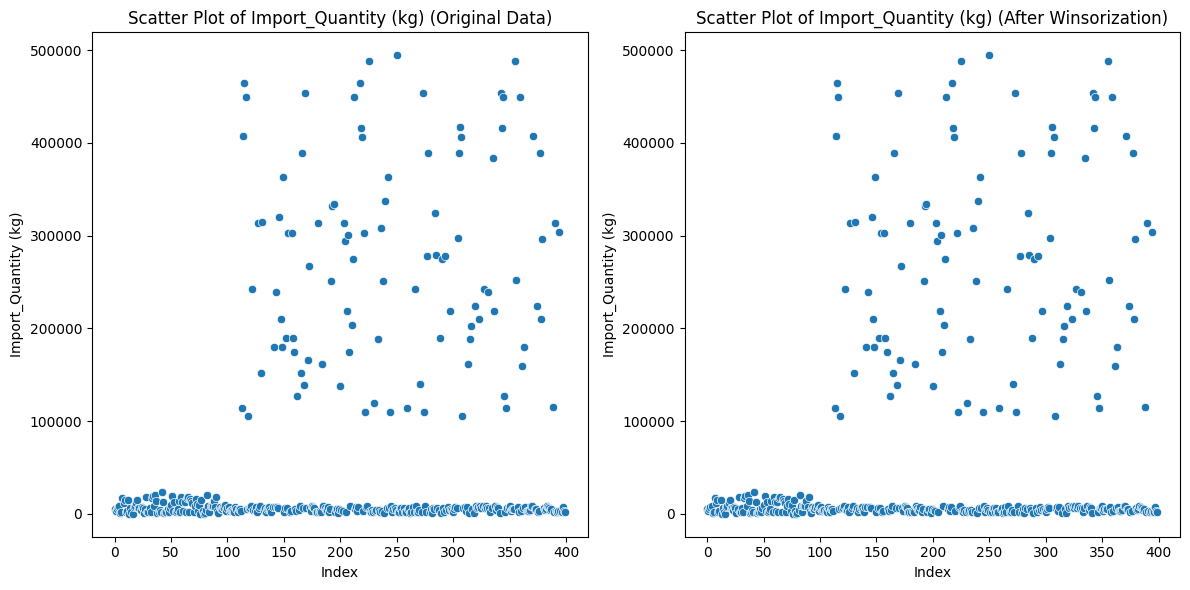

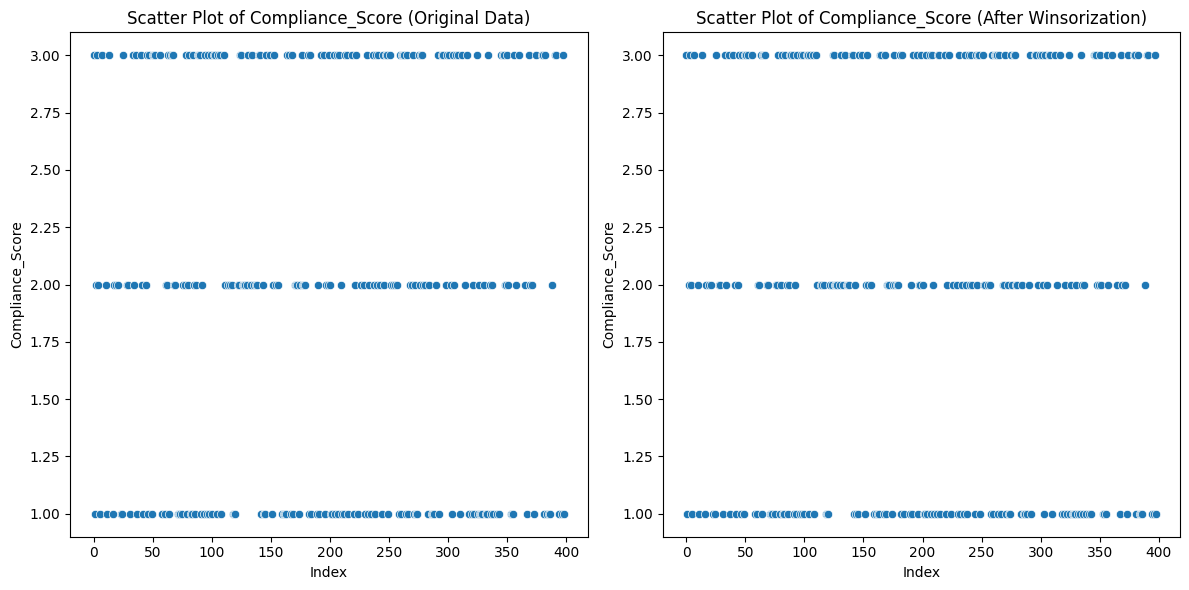

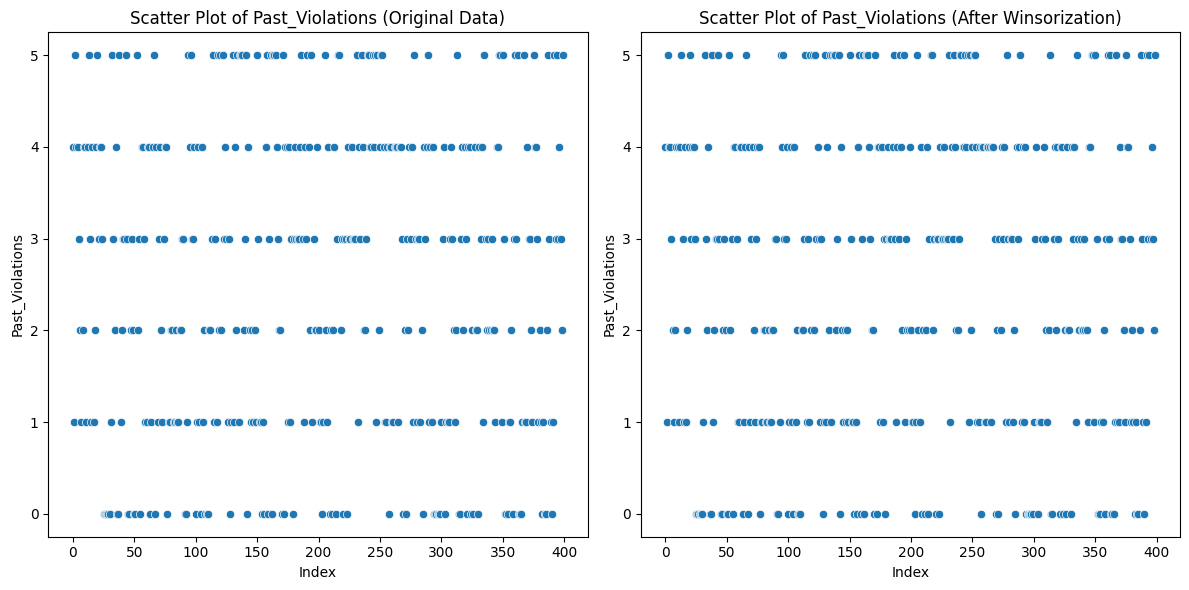

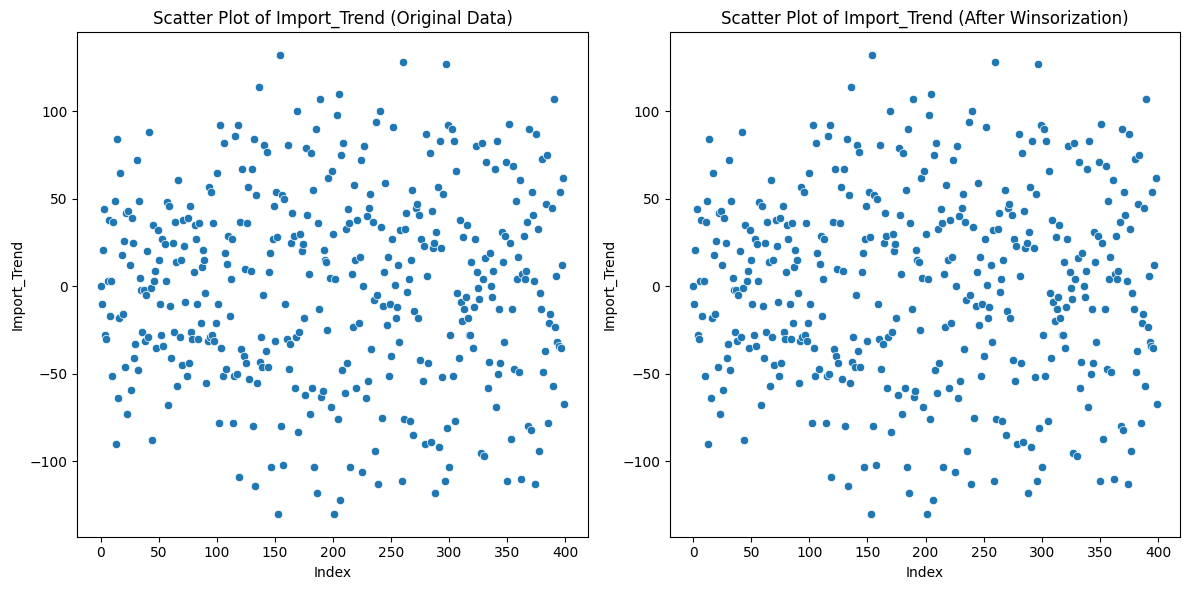

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Create a copy of the DataFrame to store original data
df_original = df.copy()

# ... Your Winsorization code here ...

# Visualize the comparison using scatter plots

for col in numerical_cols:
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed

    # Scatter plot of original data
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_original.index, y=df_original[col])
    plt.title(f'Scatter Plot of {col} (Original Data)')
    plt.xlabel('Index')
    plt.ylabel(col)

    # Scatter plot of data after Winsorization
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df.index, y=df[col])
    plt.title(f'Scatter Plot of {col} (After Winsorization)')
    plt.xlabel('Index')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

In [217]:
# Before Winsorization
print("Original Data Statistics:")
print(df_original[numerical_cols].describe())

# After Winsorization
print("\nWinsorized Data Statistics:")
print(df[numerical_cols].describe())

Original Data Statistics:
       Import_Frequency  Import_Quantity (kg)  Compliance_Score  \
count        400.000000            400.000000        290.000000   
mean          74.932500          72759.257500          1.993103   
std           39.853088         128844.794138          0.836011   
min            5.000000            102.000000          1.000000   
25%           42.000000           3419.750000          1.000000   
50%           69.500000           6738.500000          2.000000   
75%          108.000000          43932.000000          3.000000   
max          149.000000         494540.000000          3.000000   

       Past_Violations  Import_Trend  
count       400.000000    400.000000  
mean          2.477500      0.077500  
std           1.688675     55.002816  
min           0.000000   -130.000000  
25%           1.000000    -40.000000  
50%           3.000000      4.000000  
75%           4.000000     38.000000  
max           5.000000    132.000000  

Winsorized Data St

## Handling missing values





In [218]:

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select the columns with missing values that you want to impute
# In this case, it's only the 'Compliance_Score' column
columns_to_impute = ['Compliance_Score']

# Fit and transform the imputer on the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Display the dataset info after imputation
print("\nDataset after K-NN Imputation:")
df.info()



Dataset after K-NN Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Importer_ID           400 non-null    object 
 1   Chemical_Name         400 non-null    object 
 2   Import_Frequency      400 non-null    int64  
 3   Import_Quantity (kg)  400 non-null    int64  
 4   Country_of_Origin     400 non-null    object 
 5   Compliance_History    400 non-null    object 
 6   Compliance_Score      400 non-null    float64
 7   Past_Violations       400 non-null    int64  
 8   Financial_Stability   400 non-null    object 
 9   Risk_Category         400 non-null    object 
 10  Import_Trend          400 non-null    int64  
 11  Future_Prediction     400 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 37.6+ KB


In [219]:
# Print the first 50 rows of the 'Compliance_Score' column
print(df['Compliance_Score'].head(50))

print('\n Null value in Compliance_Score is : ', df['Compliance_Score'].isnull().sum())


0     3.000000
1     1.000000
2     2.000000
3     3.000000
4     2.000000
5     1.000000
6     1.993103
7     3.000000
8     1.993103
9     1.993103
10    2.000000
11    1.000000
12    1.993103
13    3.000000
14    1.993103
15    1.993103
16    1.000000
17    2.000000
18    1.993103
19    2.000000
20    1.993103
21    2.000000
22    1.993103
23    1.000000
24    1.000000
25    3.000000
26    1.993103
27    1.993103
28    2.000000
29    2.000000
30    1.993103
31    1.000000
32    1.993103
33    3.000000
34    2.000000
35    1.993103
36    3.000000
37    1.000000
38    1.993103
39    1.993103
40    3.000000
41    2.000000
42    1.000000
43    1.993103
44    2.000000
45    3.000000
46    1.000000
47    3.000000
48    1.993103
49    1.000000
Name: Compliance_Score, dtype: float64

 Null value in Compliance_Score is :  0


# Categorical cols

### Data Encoding


In [220]:
# Step 3: Encoding the Categorical Columns
# Label Encoding for binary categories first


label_cols = ['Compliance_History', 'Risk_Category', 'Future_Prediction']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Check if encoding is correct
# print(df.head())

#Now perform OneHotEncoding on other features
categorical_cols = ["Chemical_Name", "Country_of_Origin", "Financial_Stability"] #Remove 'Compliance_History'
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded data with original DataFrame
df = pd.concat([df, cat_data], axis=1)

# Drop original categorical columns (optional)
df.drop(columns=categorical_cols, inplace=True)  #Remove 'Compliance_History' from drop list as it has already been label encoded

# Now, df.head() should show the encoded columns
df.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Compliance_History,Compliance_Score,Past_Violations,Risk_Category,Import_Trend,Future_Prediction,Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates,...,Country_of_Origin_Germany,Country_of_Origin_India,Country_of_Origin_Japan,Country_of_Origin_Pakistan,Country_of_Origin_Russia,Country_of_Origin_South Korea,Country_of_Origin_USA,Country_of_Origin_United Kingdom,Financial_Stability_Low,Financial_Stability_Medium
0,IMP001,36,5199,1,3.0,4,1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IMP002,26,3398,3,1.0,1,0,-10,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IMP003,47,5626,0,2.0,5,1,21,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,IMP004,91,7700,1,3.0,4,0,44,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,IMP005,63,8377,0,2.0,4,0,-28,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
df.drop(columns=['Importer_ID'], inplace=True)

df.head()

,Import_Frequency,Import_Quantity (kg),Compliance_History,Compliance_Score,Past_Violations,Risk_Category,Import_Trend,Future_Prediction,Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates,Chemical_Name_Chlorine,...,Country_of_Origin_Germany,Country_of_Origin_India,Country_of_Origin_Japan,Country_of_Origin_Pakistan,Country_of_Origin_Russia,Country_of_Origin_South Korea,Country_of_Origin_USA,Country_of_Origin_United Kingdom,Financial_Stability_Low,Financial_Stability_Medium
0,36,5199,1,3.0,4,1,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,3398,3,1.0,1,0,-10,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,5626,0,2.0,5,1,21,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,91,7700,1,3.0,4,0,44,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,63,8377,0,2.0,4,0,-28,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Scaling Numerical Features

In [222]:

# Scale numerical features
numerical_cols = ['Import_Frequency', 'Import_Quantity (kg)', 'Compliance_Score', 'Past_Violations', 'Import_Trend']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check scaled features
print(df.head())


   Import_Frequency  Import_Quantity (kg)  Compliance_History  \
0         -0.978124             -0.525010                   1   
1         -1.229360             -0.539006                   3   
2         -0.701764             -0.521692                   0   
3          0.403673             -0.505575                   1   
4         -0.299787             -0.500314                   0   

   Compliance_Score  Past_Violations  Risk_Category  Import_Trend  \
0          1.416948         0.902724              1     -0.001411   
1         -1.397538        -0.876042              0     -0.183447   
2          0.009705         1.495646              1      0.380866   
3          1.416948         0.902724              0      0.799550   
4          0.009705         0.902724              0     -0.511113   

   Future_Prediction  \
0                  0   
1                  0   
2                  1   
3                  1   
4                  0   

   Chemical_Name_Chlorates and perchlorates; brom

In [223]:
df.head()

,Import_Frequency,Import_Quantity (kg),Compliance_History,Compliance_Score,Past_Violations,Risk_Category,Import_Trend,Future_Prediction,Chemical_Name_Chlorates and perchlorates; bromates and perbromates; iodates and periodates,Chemical_Name_Chlorine,...,Country_of_Origin_Germany,Country_of_Origin_India,Country_of_Origin_Japan,Country_of_Origin_Pakistan,Country_of_Origin_Russia,Country_of_Origin_South Korea,Country_of_Origin_USA,Country_of_Origin_United Kingdom,Financial_Stability_Low,Financial_Stability_Medium
0,-0.978124,-0.525010,1,1.416948,0.902724,1,-0.001411,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.229360,-0.539006,3,-1.397538,-0.876042,0,-0.183447,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.701764,-0.521692,0,0.009705,1.495646,1,0.380866,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.403673,-0.505575,1,1.416948,0.902724,0,0.799550,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.299787,-0.500314,0,0.009705,0.902724,0,-0.511113,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##  Feature Selection

### Correlation Matrix for Numerical Features

In [224]:
# Assuming 'df' is your DataFrame and 'Future_Prediction' is your target variable
X = df.drop(columns=['Future_Prediction'])  # Features
y = df['Future_Prediction']            # Target variable

# Fit Random Forest model to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
print(importance_df.sort_values(by='Importance', ascending=False))

                                              Feature  Importance
6                                        Import_Trend    0.657878
0                                    Import_Frequency    0.170615
1                                Import_Quantity (kg)    0.040570
4                                     Past_Violations    0.017582
2                                  Compliance_History    0.010226
3                                    Compliance_Score    0.008837
30                         Financial_Stability_Medium    0.006999
11  Chemical_Name_Fluorides; fluorosilicates, fluo...    0.006568
5                                       Risk_Category    0.006559
29                            Financial_Stability_Low    0.005503
7   Chemical_Name_Chlorates and perchlorates; brom...    0.004952
17                Chemical_Name_Sulphuric acid; oleum    0.004915
19                            Country_of_Origin_China    0.004758
18                           Country_of_Origin_Canada    0.004751
23        

<Figure size 1200x800 with 0 Axes>

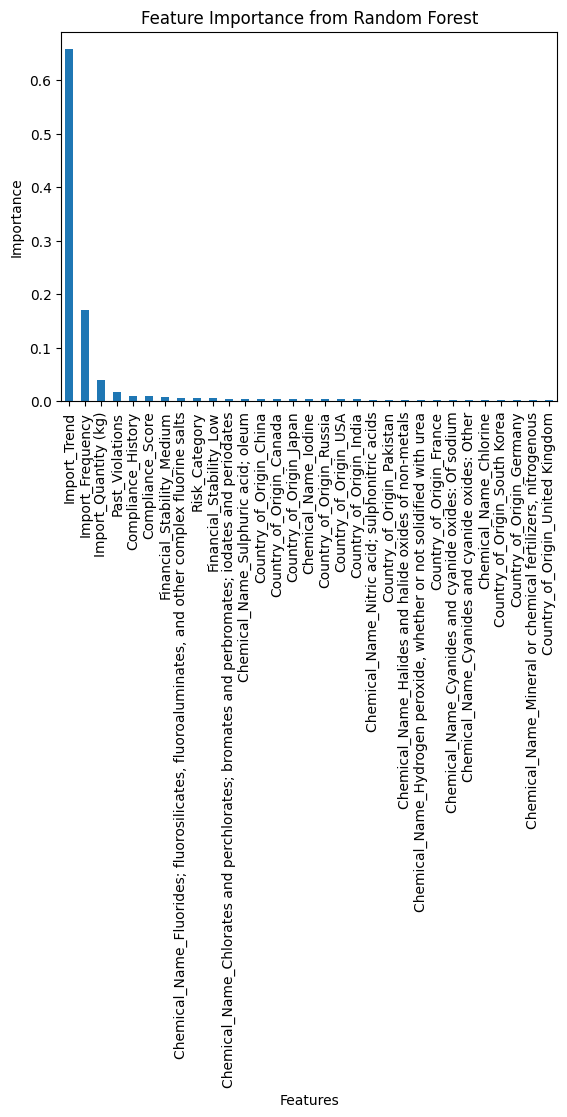

In [225]:


# Plot feature importance
plt.figure(figsize=(12, 8))
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)  # Rotate feature names if they're long
plt.show()


## Model Selection

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Compare accuracies
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Print classification reports for more detailed evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Accuracy: 1.0
Neural Network Accuracy: 0.95
XGBoost Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.96      0.96      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00     

#  Train Model and Check Predictions

###  Visualize the Target Variable

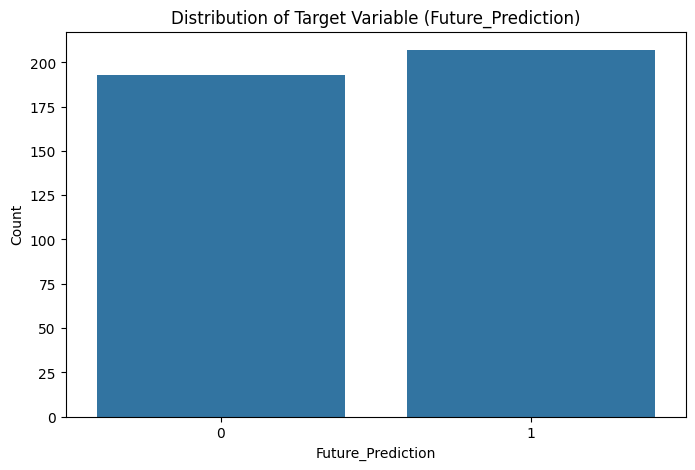

In [227]:
# Visualize the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Future_Prediction', data=df)
plt.title('Distribution of Target Variable (Future_Prediction)')
plt.xlabel('Future_Prediction')
plt.ylabel('Count')
plt.show()

### Balance the Dataset Using SMOTE

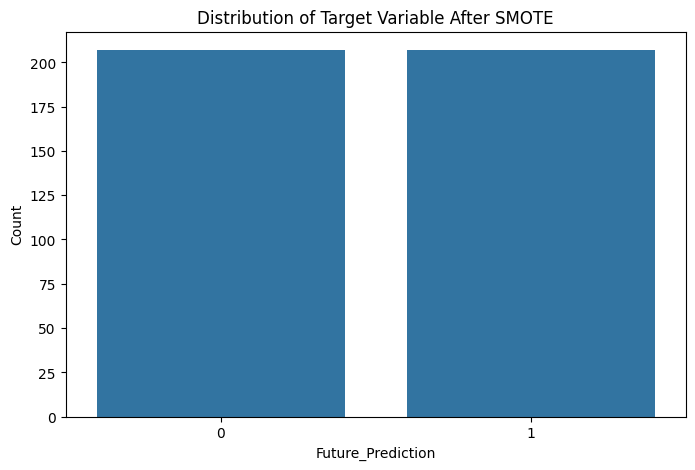

In [228]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop(columns=['Future_Prediction'])  # Features
y = df['Future_Prediction']  # Target variable

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Future_Prediction')
plt.ylabel('Count')
plt.show()

## Split Data into Train and Test Sets

In [229]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data split shapes
print(X_train.shape, X_test.shape)


(320, 31) (80, 31)


### Train the Model (Random Forest Example)

In [230]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit model using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# *** INSERT CROSS-VALIDATION CODE HERE ***
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)  # Using training data for cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())
# *** END OF CROSS-VALIDATION CODE ***

# Model accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report\n\n# Fit model using Random Forest\nmodel = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train)\n\n# *** INSERT CROSS-VALIDATION CODE HERE ***\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(model, X_train, y_train, cv=5)  # Using training data for cross-validation\nprint("Cross-validation scores:", scores)\nprint("Average cross-validation score:", scores.mean())\n# *** END OF CROSS-VALIDATION CODE ***\n\n# Model accuracy\naccuracy = model.score(X_test, y_test)\nprint(f"Model Accuracy: {accuracy * 100:.2f}%")\n\n# Classification report\ny_pred = model.predict(X_test)\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))\n'

In [231]:
"""# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix  # Import confusion_matrix here


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()"""

"# Import the necessary libraries\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, confusion_matrix  # Import confusion_matrix here\n\n\n# Plot the confusion matrix\nplt.figure(figsize=(8, 6))\nsns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')\nplt.title('Confusion Matrix')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.show()"

In [232]:
"""{# Example input data

input_data = {
    'Import_Frequency': 10,
    'Import_Quantity (kg)': 0,
    'Compliance_History': 'Good',
    'Compliance_Score': 0.5,
    'Past_Violations': 0,
    'Risk_Category': 'Low',
    'Import_Trend': 1,
    'Chemical_Name': 'Chemical A',
    'Country_of_Origin': 'USA',
    'Financial_Stability': 'Stable'
}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Ensure Compliance_History and Risk_Category are within the known classes of the LabelEncoder
# If not, replace with a known class or handle the unknown value appropriately
for col in ['Compliance_History', 'Risk_Category']:
    if input_df[col][0] not in le.classes_:
        # Here, we replace with the first class as an example.
        # You might need a more robust strategy for handling unknown values.
        input_df[col] = le.classes_[0]

# Encode categorical variables using the fitted LabelEncoder
input_df['Compliance_History'] = le.transform(input_df['Compliance_History'])
input_df['Risk_Category'] = le.transform(input_df['Risk_Category'])

# One-hot encode categorical variables
input_encoded = encoder.transform(input_df[['Chemical_Name', 'Country_of_Origin', 'Financial_Stability']])
input_encoded_df = pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(['Chemical_Name', 'Country_of_Origin', 'Financial_Stability']))

# Drop original categorical columns and concatenate encoded columns
input_df = input_df.drop(columns=['Chemical_Name', 'Country_of_Origin', 'Financial_Stability'])
input_df = pd.concat([input_df, input_encoded_df], axis=1)

# Scale numerical features
input_df[['Import_Frequency', 'Import_Quantity (kg)', 'Compliance_Score', 'Past_Violations', 'Import_Trend']] = scaler.transform(input_df[['Import_Frequency', 'Import_Quantity (kg)', 'Compliance_Score', 'Past_Violations', 'Import_Trend']])

# Ensure the input data has the same columns as the training data
missing_cols = set(X.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# Reorder columns to match the training data
input_df = input_df[X.columns]

# Make a prediction
prediction = model.predict(input_df)

# Decode the prediction (if necessary)
prediction_label = le.inverse_transform(prediction)

print("random forest Prediction  :", prediction_label[0])}"""

'{# Example input data\n\ninput_data = {\n    \'Import_Frequency\': 10,\n    \'Import_Quantity (kg)\': 0,\n    \'Compliance_History\': \'Good\',\n    \'Compliance_Score\': 0.5,\n    \'Past_Violations\': 0,\n    \'Risk_Category\': \'Low\',\n    \'Import_Trend\': 1,\n    \'Chemical_Name\': \'Chemical A\',\n    \'Country_of_Origin\': \'USA\',\n    \'Financial_Stability\': \'Stable\'\n}\n\n# Convert input data to a DataFrame\ninput_df = pd.DataFrame([input_data])\n\n# Ensure Compliance_History and Risk_Category are within the known classes of the LabelEncoder\n# If not, replace with a known class or handle the unknown value appropriately\nfor col in [\'Compliance_History\', \'Risk_Category\']:\n    if input_df[col][0] not in le.classes_:\n        # Here, we replace with the first class as an example.\n        # You might need a more robust strategy for handling unknown values.\n        input_df[col] = le.classes_[0]\n\n# Encode categorical variables using the fitted LabelEncoder\ninput_df[

## nutral network part

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 95.00%

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.96      0.96      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



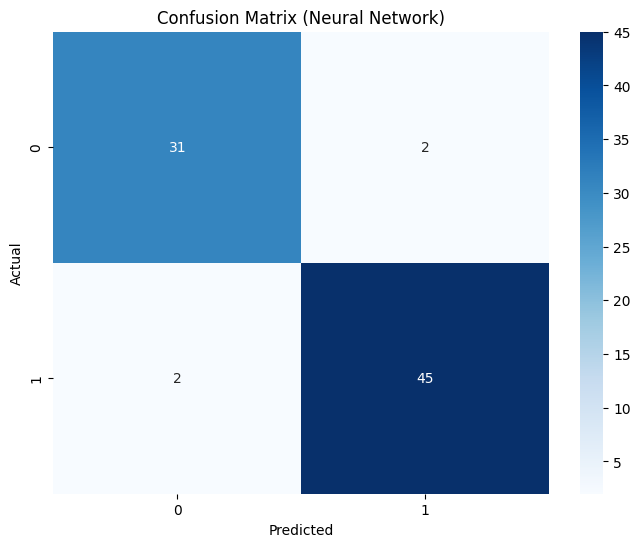

In [233]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing data preprocessing and feature selection code) ...

# Train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)  # Adjust parameters as needed
nn_model.fit(X_train, y_train)

# Model accuracy
nn_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")

# Classification report
y_pred_nn = nn_model.predict(X_test)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ... (Your existing input fields and prediction code, adapted for nn_model) ...

In [234]:
# Example input data (you'll need to modify this based on your actual input)
input_data = {
    'Import_Frequency': 1,
    'Import_Quantity (kg)': 1,
    'Compliance_History': 'Good',
    'Compliance_Score': 0.5,
    'Past_Violations': 0,
    'Risk_Category': 'risk',
    'Import_Trend': 1,
    'Chemical_Name': 'Chemical A',
    'Country_of_Origin': 'USA',
    'Financial_Stability': 'Stable'
}

# Convert input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Ensure Compliance_History and Risk_Category are within the known classes of the LabelEncoder
# If not, replace with a known class or handle the unknown value appropriately
for col in ['Compliance_History', 'Risk_Category']:
    if input_df[col][0] not in le.classes_:
        input_df[col] = le.classes_[0]

# Encode categorical variables using the fitted LabelEncoder
input_df['Compliance_History'] = le.transform(input_df['Compliance_History'])
input_df['Risk_Category'] = le.transform(input_df['Risk_Category'])

# One-hot encode categorical variables
input_encoded = encoder.transform(input_df[['Chemical_Name', 'Country_of_Origin', 'Financial_Stability']])
input_encoded_df = pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(['Chemical_Name', 'Country_of_Origin', 'Financial_Stability']))

# Drop original categorical columns and concatenate encoded columns
input_df = input_df.drop(columns=['Chemical_Name', 'Country_of_Origin', 'Financial_Stability'])
input_df = pd.concat([input_df, input_encoded_df], axis=1)

# Scale numerical features
input_df[['Import_Frequency', 'Import_Quantity (kg)', 'Compliance_Score', 'Past_Violations', 'Import_Trend']] = scaler.transform(input_df[['Import_Frequency', 'Import_Quantity (kg)', 'Compliance_Score', 'Past_Violations', 'Import_Trend']])

# Ensure the input data has the same columns as the training data
missing_cols = set(X.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0

# Reorder columns to match the training data
input_df = input_df[X.columns]


# Make a prediction using the Neural Network model
prediction_nn = nn_model.predict(input_df)

# Decode the prediction (if necessary)
prediction_label_nn = le.inverse_transform(prediction_nn)

print("Neural Network Prediction:", prediction_label_nn[0])

Neural Network Prediction: Decrease in imports


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
